# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
#read in the data
baseball_salaries = pd.read_csv('data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [4]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


In [5]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

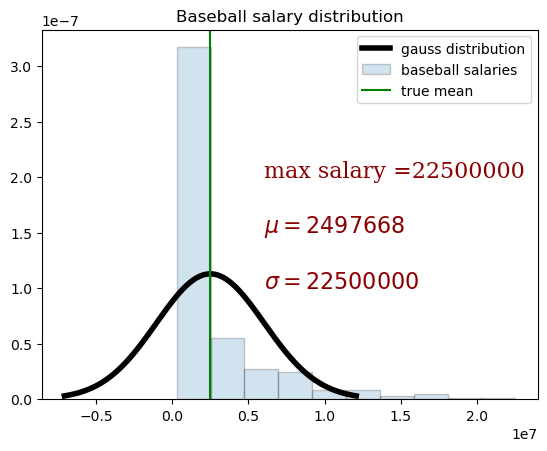

In [6]:
#histogram of the salaries
mean = int(baseball_salaries['salary'].mean())
std = int(baseball_salaries['salary'].std())
max = int(baseball_salaries['salary'].max())
up = mean*2 + std*2
lo = -(std*2)
x = np.linspace(lo,up,len(baseball_salaries['salary']))
gauss = norm(loc = mean, scale = std)
plt.plot(x, gauss.pdf(x), color = 'black', linewidth = 4, label = 'gauss distribution')
plt.hist(baseball_salaries['salary'], density=True, alpha = 0.2, bins = 10, edgecolor = 'black', label = 'baseball salaries',)
plt.axvline(mean, label = 'true mean', color = 'green')
plt.text( 6000000, 0.00000020 , r'max salary ={}'.format(max), fontdict=font)
plt.text( 6000000, 0.00000015 , r'$\mu ={}$'.format(mean), fontdict=font)
plt.text( 6000000, 0.00000010 , r'$\sigma ={}$'.format(max), fontdict=font)
plt.title('Baseball salary distribution')
plt.legend();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


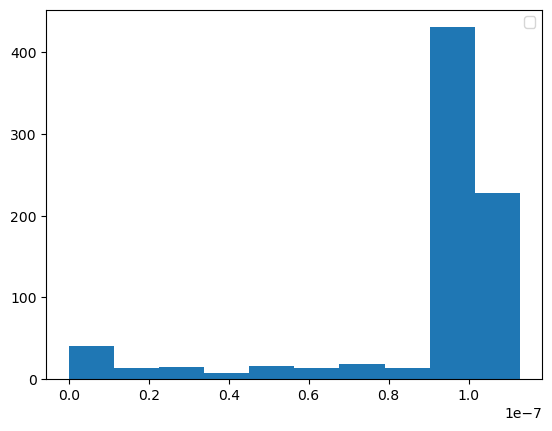

In [7]:
#plt.plot(baseball_salaries['salary'], norm.pdf(baseball_salaries['salary']), color = 'black', linewidth = 4, label = 'distribution')
plt.hist(gauss.pdf(baseball_salaries['salary']))
plt.legend();

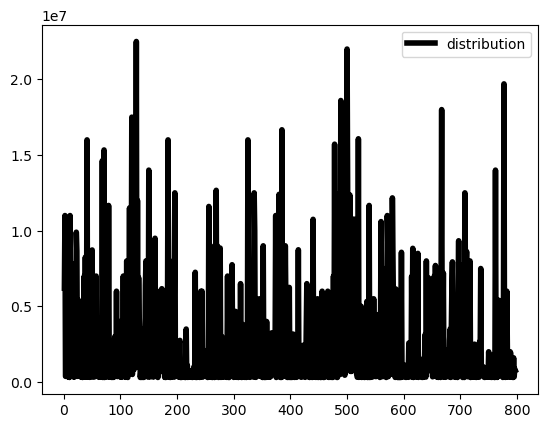

In [8]:
plt.plot(baseball_salaries['salary'], color = 'black', linewidth = 4, label = 'distribution')
plt.legend();

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [9]:
baseball_salaries['salary'].sample(4)

264      310000
2      11000000
369      550000
152      800000
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

In [10]:
#empty list for sample means
means = {}
stds = {}
sample_means = []
samples_stds = []
num=5
for i in range(1000):
    #your code below
    sample = baseball_salaries['salary'].sample(num)
    sample_mean = np.mean(sample)
    samples_std = np.std(sample)
    sample_means.append(sample_mean)
    samples_stds.append(samples_std)
means[num] = sample_means
stds[num] = samples_stds
print(len(sample_means), len(samples_stds))    

1000 1000


(array([230., 240., 214., 154.,  71.,  46.,  25.,  11.,   6.,   3.]),
 array([ 305800., 1217832., 2129864., 3041896., 3953928., 4865960.,
        5777992., 6690024., 7602056., 8514088., 9426120.]),
 <BarContainer object of 10 artists>)

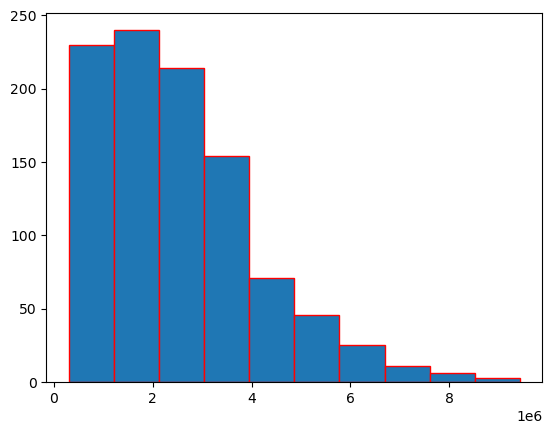

In [11]:
#histogram of sample means
plt.hist(means[5], edgecolor='red')

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.

In [12]:
for num in [10,25,50,100]:
    sample_means = []
    samples_stds = []
    for i in range(1000):
        #your code below
        sample = baseball_salaries['salary'].sample(num)
        sample_mean = np.mean(sample)
        samples_std = np.std(sample)
        sample_means.append(sample_mean)
        samples_stds.append(samples_std)
    means[num] = sample_means
    stds[num] = samples_stds


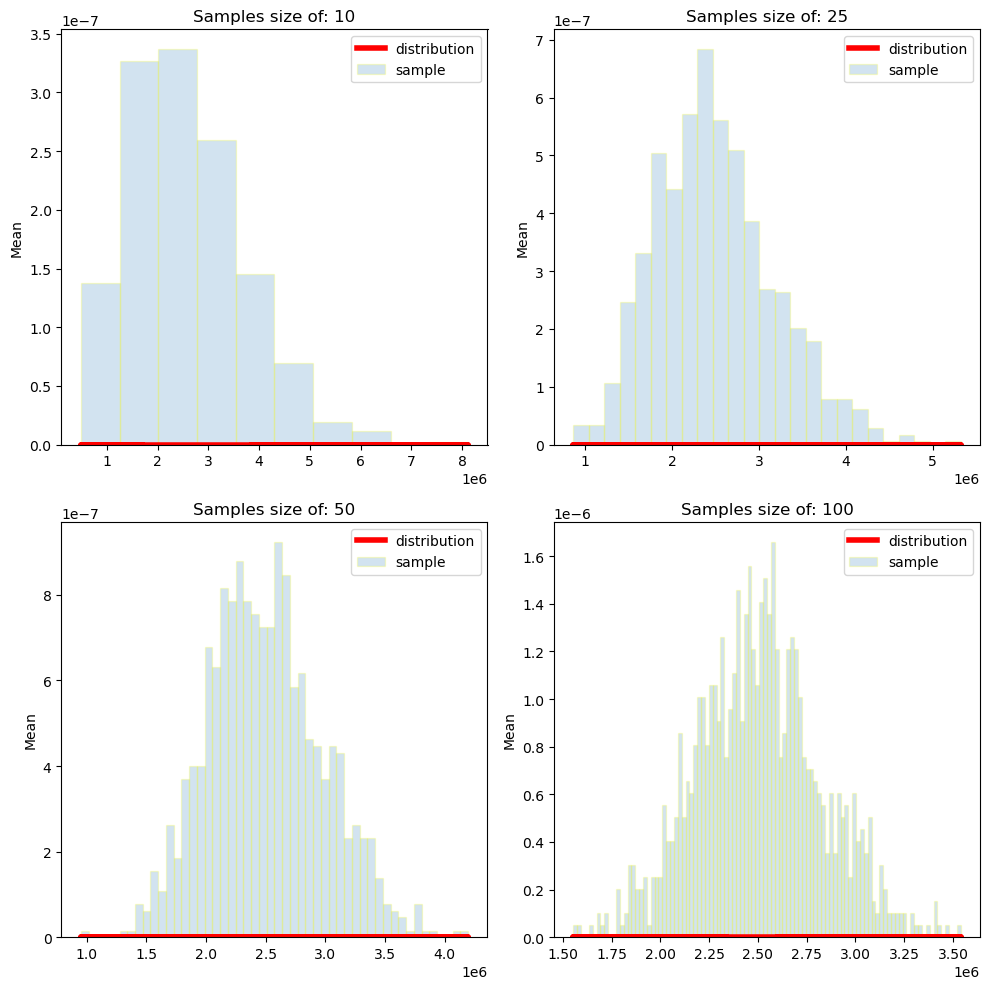

In [13]:
import matplotlib.pyplot as plt
fig, a = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
a = a.ravel()
for idx,ax in zip([10,25,50,100],a):
    ax.plot(means[idx], norm.pdf(means[idx]), color = 'red', linewidth = 4, label = 'distribution')
    ax.hist(means[idx], density=True, alpha = 0.2, bins = idx, edgecolor = 'yellow', label = 'sample',)
    ax.set_title("Samples size of: {}".format(idx))
    ax.set_ylabel('Mean')
    ax.legend()
plt.tight_layout()

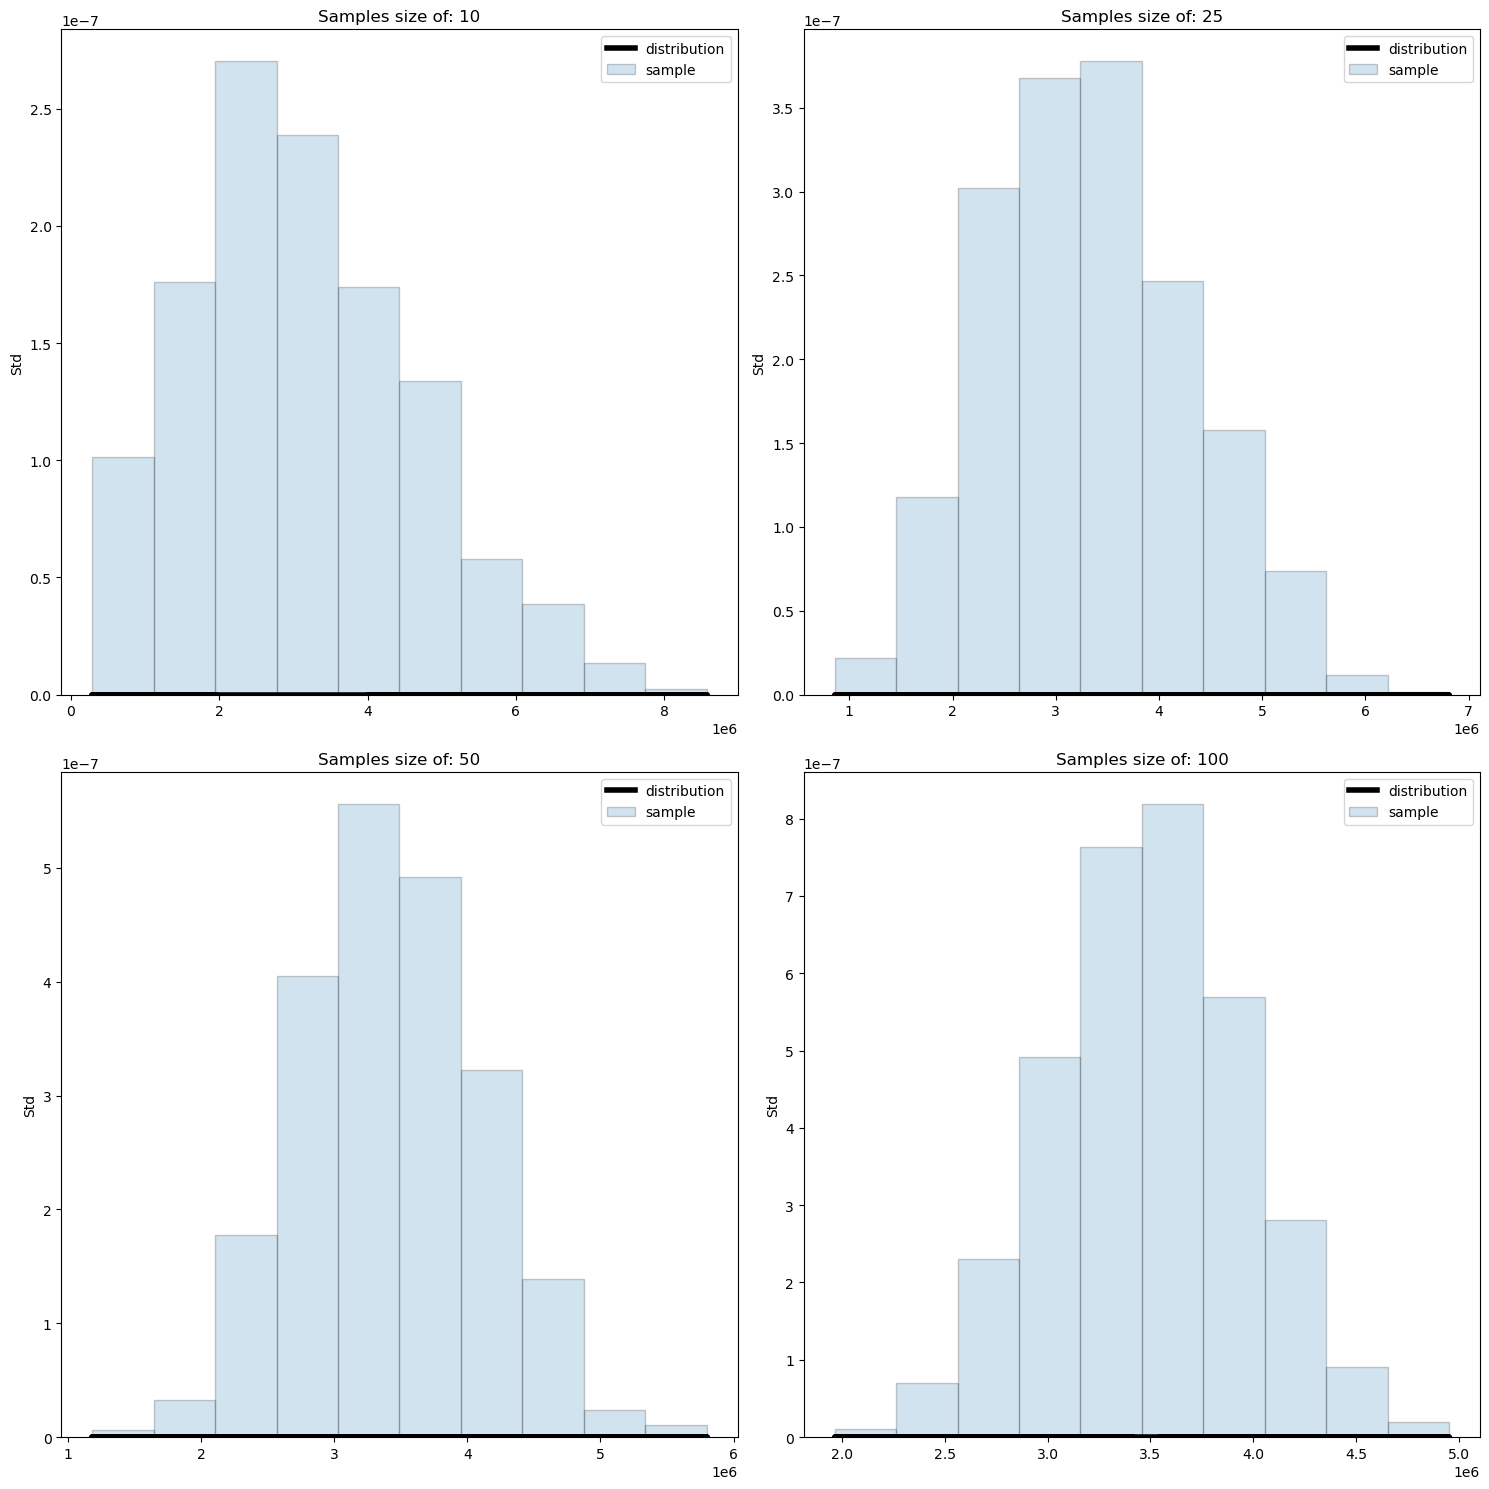

In [14]:
import matplotlib.pyplot as plt
fig, a = plt.subplots(nrows=2, ncols=2,figsize=(15, 15))
a = a.ravel()
for idx,ax in zip([10,25,50,100],a):
    ax.plot(stds[idx], norm.pdf(stds[idx]), color = 'black', linewidth = 4, label = 'distribution',)
    ax.hist(stds[idx], density=True, alpha = 0.2, bins = 10, edgecolor = 'black', label = 'sample')
    ax.set_title("Samples size of: {}".format(idx))
    ax.set_ylabel('Std')
    ax.legend()
plt.tight_layout()


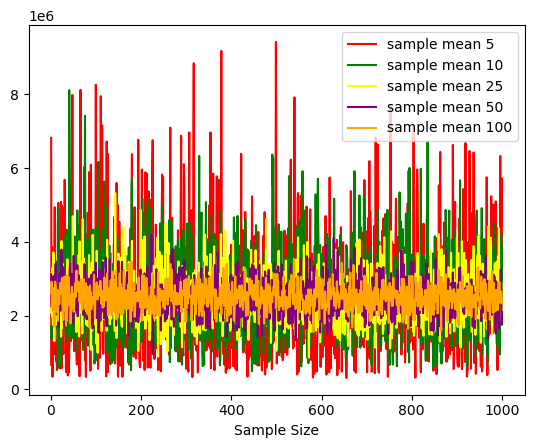

In [15]:
plt.plot(range(1,1001),means[5],label = 'sample mean 5', color = 'red')
plt.plot(range(1,1001),means[10],label = 'sample mean 10', color = 'green')
plt.plot(range(1,1001),means[25],label = 'sample mean 25', color = 'yellow')
plt.plot(range(1,1001),means[50],label = 'sample mean 50', color = 'purple')
plt.plot(range(1,1001),means[100],label = 'sample mean 100', color = 'orange')

plt.xlabel('Sample Size')
plt.legend()

In [16]:
(sum([5,8,9,6])//4)

7

In [17]:
len(stds[5])

1000

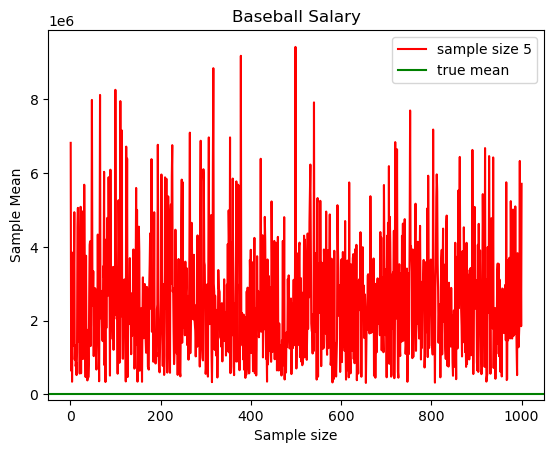

In [18]:
plt.plot(range(1, 1001), means[5], label = 'sample size 5', color = 'red')
#plt.plot(range(1, 1001), list((sorted(means[10]))), label = 'sample size 10', color = 'green')
#plt.plot(range(1, 1001), list((sorted(means[25]))), label = 'sample size 25', color = 'orange')
#plt.plot(range(1, 1001), list((sorted(means[50]))), label = 'sample size 50', color = 'blue')
#plt.plot(range(1, 1001), list((sorted(means[100]))), label = 'sample size 100', color = 'brown')
plt.axhline(4, label = 'true mean', color = 'green')
plt.xlabel('Sample size')
plt.ylabel('Sample Mean')
plt.title('Baseball Salary')
plt.legend();

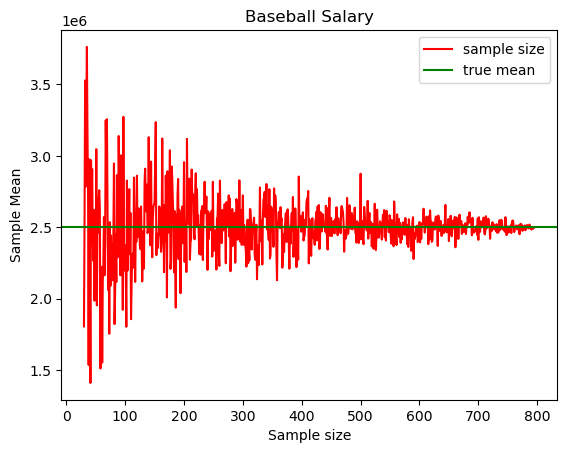

In [19]:

sample_means = []
sample_stds = []
sal_size = len(baseball_salaries['salary'])

for i in range(30,sal_size):
    #your code below
    sample = baseball_salaries['salary'].sample(i)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    sample_means.append(sample_mean)
    sample_stds.append(sample_std)
    
true_mean =  int(sum(sample_means)//len(sample_means))
plt.plot(range(30, sal_size), sample_means, label = 'sample size', color = 'red')
plt.axhline(true_mean, label = 'true mean', color = 'green')
plt.xlabel('Sample size')
plt.ylabel('Sample Mean')
plt.title('Baseball Salary')
plt.legend();

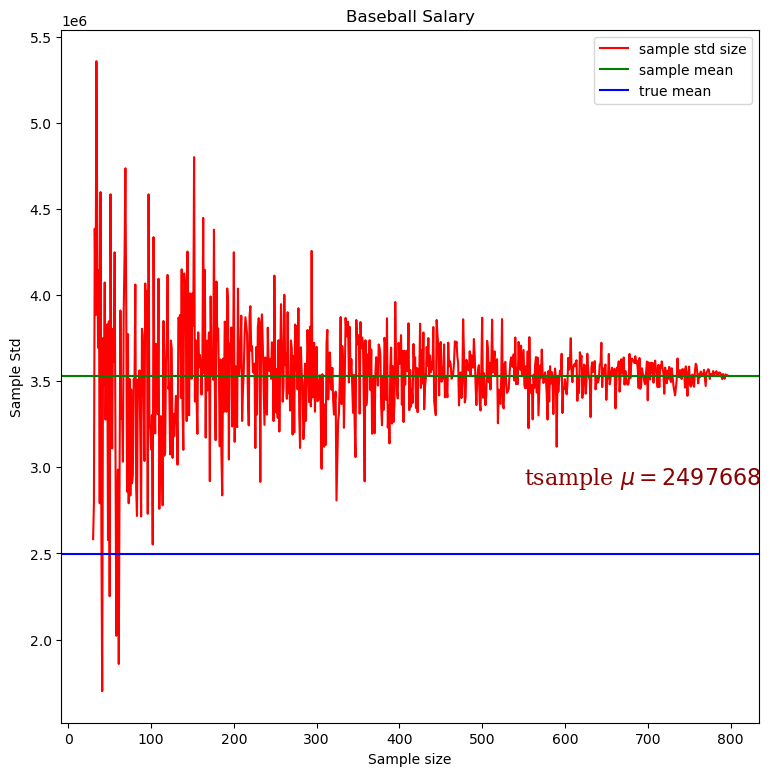

In [20]:
plt.figure(figsize=(9, 9))
sample_std = int(sum(sample_stds)//len(sample_stds))
plt.plot(range(30, sal_size), sample_stds, label = 'sample std size', color = 'red')
plt.axhline(sample_std, label = 'sample mean', color = 'green')
plt.axhline(mean, label = 'true mean', color = 'blue')
plt.xlabel('Sample size')
plt.ylabel('Sample Std')
plt.title('Baseball Salary')
plt.text( 550, 2900000 , r'tsample $\mu ={}$'.format(mean), fontdict=font)
plt.legend();

AttributeError: 'Axes' object has no attribute 'xlabel'

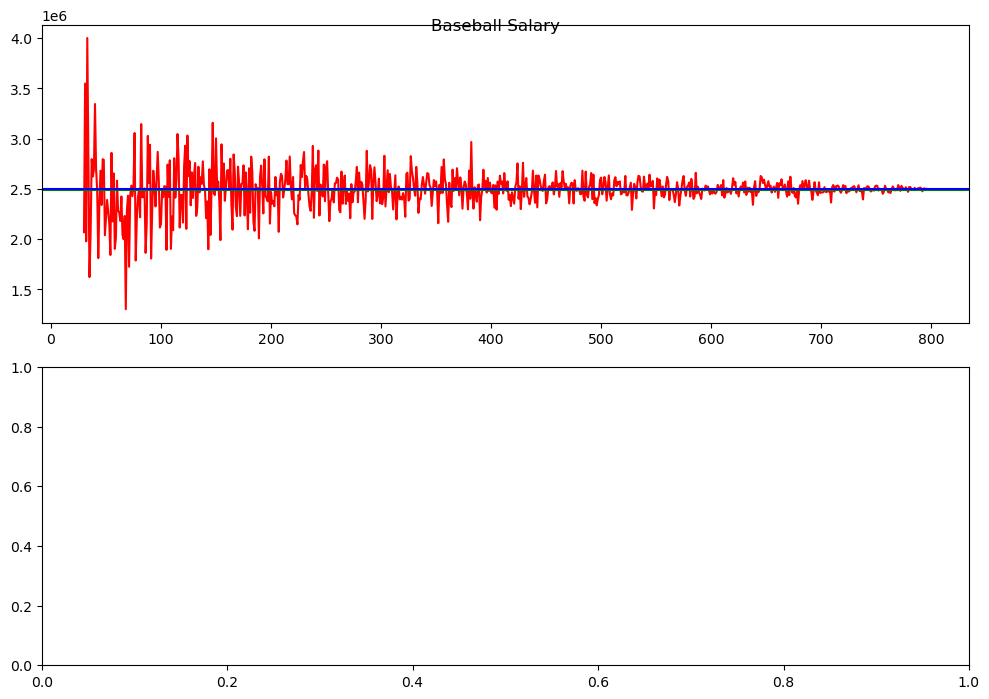

In [21]:
sample_means = []
sample_stds = []
sal_size = len(baseball_salaries['salary'])

for i in range(30,sal_size):
    #your code below
    sample = baseball_salaries['salary'].sample(i)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    sample_means.append(sample_mean)
    sample_stds.append(sample_std)
    
fig, ax = plt.subplots(2,1, figsize=(10,7))
fig.tight_layout()
fig.suptitle('Baseball Salary')

sample_mu =  int(sum(sample_means)//len(sample_means))
ax[0].plot(range(30, sal_size), sample_means, label = 'sample size', color = 'red')
ax[0].axhline(sample_mu, label = 'sample mean', color = 'green')
ax[0].axhline(mean, label = 'true mean', color = 'blue')
ax[0].xlabel('Sample size')
ax[0].ylabel('Sample Mean')
ax[0].title('Baseball Salary')
ax[0].text( 550, 2900000 , r'true $\mu ={}$'.format(mean), fontdict=font)
ax[0].text( 550, 2700000 , r'sample $\mu ={}$'.format(sample_mu), fontdict=font)
ax[0].legend();

true_std = sum(sample_stds)//len(sample_stds)
ax[1].plot(range(30, sal_size), sample_stds, label = 'sample std size', color = 'red')
ax[1].axhline(true_std, label = 'sample mean', color = 'green')
ax[1].xlabel('Sample size')
ax[1].ylabel('Sample Std')
ax[1].title('Baseball Salary')
ax[1].legend();
